#Text Classification (AI or Human Written) with tfidf and Machine Learning Models

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Defining file paths for the training and testing datasets stored on Google Drive.


In [ ]:
train_path="/content/train_df (1).csv"
test_path ="/content/test_df (1).csv"
# coling_path="/content/train_COLING.csv"
pan_path = "/content/val.csv"

# Load  datasets


In [ ]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
# coling_df = pd.read_csv(coling_path)
pan_df = pd.read_csv(pan_path)

In [ ]:
print(train_df.shape)
print(test_df.shape)
# print(coling_df.shape)
print(pan_df.shape)

(9996, 2)
(2500, 2)
(3589, 5)


In [ ]:
train_df = train_df.dropna(subset=['text'])
test_df = test_df.dropna(subset=['text'])
# coling_df = coling_df.dropna(subset=['text'])
pan_df = pan_df.dropna(subset=['text'])

In [ ]:
# Check duplicates in the 'train_df' DataFrame
duplicate_train = train_df.duplicated(subset=['text'])

# Check duplicates in the 'test_df' DataFrame
duplicate_test = test_df.duplicated(subset=['text'])



# Count the number of duplicates
print(f"Duplicate rows in train_df: {duplicate_train.sum()}")
print(f"Duplicate rows in test_df: {duplicate_test.sum()}")


Duplicate rows in train_df: 552
Duplicate rows in test_df: 34


In [ ]:
# Drop duplicate rows in 'train_df'
train_df = train_df.drop_duplicates(subset=['text'])

# Drop duplicate rows in 'test_df'
test_df = test_df.drop_duplicates(subset=['text'])

# coling_df = coling_df.drop_duplicates(subset=['text'])
pan_df = pan_df.drop_duplicates(subset=['text'])


### Using a small subset of the data


In [ ]:
train_df = train_df.sample(n=2000, random_state=42)
test_df = test_df.sample(n=700, random_state=42)
# coling_df = coling_df.sample(n=700, random_state=42)
pan_df = pan_df.sample(n=700, random_state=42)

# Splitting the dataset into features (text) and labels (target).


In [ ]:
X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']
# X_coling = coling_df['text']
# y_coling = coling_df['label']
X_pan = pan_df['text']
y_pan = pan_df['label']

# Initialize the TF-IDF Vectorizer


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=25000)

# Convert the training and testing text data into TF-IDF vectors




In [ ]:
X_train_vectors = tfidf_vectorizer.fit_transform(X_train).toarray()  # Fit and transform the training corpus.
X_test_vectors = tfidf_vectorizer.transform(X_test).toarray()        # Transform the test corpus using the fitted vectorizer.
# X_coling_vectors = tfidf_vectorizer.transform(X_coling).toarray()
X_pan_vectors = tfidf_vectorizer.transform(X_pan).toarray()

# Save the vectorizer

In [ ]:
# joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

# Initialize models


In [ ]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=47)
svm_model = SVC(probability=True)
nb_model = GaussianNB()
rf_model = RandomForestClassifier(random_state=47)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
models = {
    'XGBoost': xgb_model,
    'SVM': svm_model,
    'Naive Bayes': nb_model,
    'Random Forest': rf_model,
    'GradientBoosting': gbc
}

# Train and evaluate models


Evaluation of model XGBoost
ROC AUC Score: 0.9884
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       369
           1       0.95      0.94      0.94       331

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700



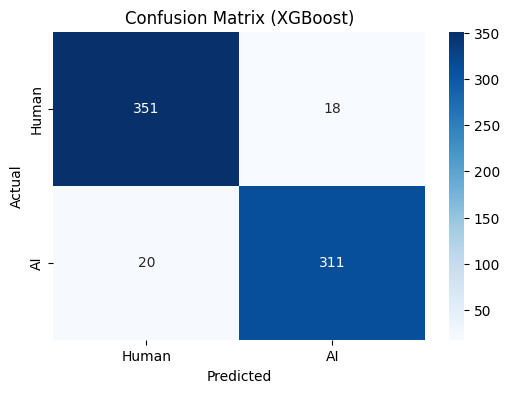

Evaluation of model SVM
ROC AUC Score: 0.9800
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       369
           1       0.95      0.92      0.94       331

    accuracy                           0.94       700
   macro avg       0.94      0.94      0.94       700
weighted avg       0.94      0.94      0.94       700



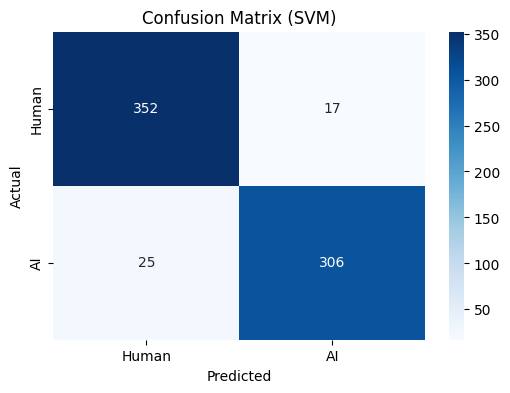

Evaluation of model Naive Bayes
ROC AUC Score: 0.6530
              precision    recall  f1-score   support

           0       0.62      0.94      0.75       369
           1       0.85      0.37      0.51       331

    accuracy                           0.67       700
   macro avg       0.73      0.65      0.63       700
weighted avg       0.73      0.67      0.64       700



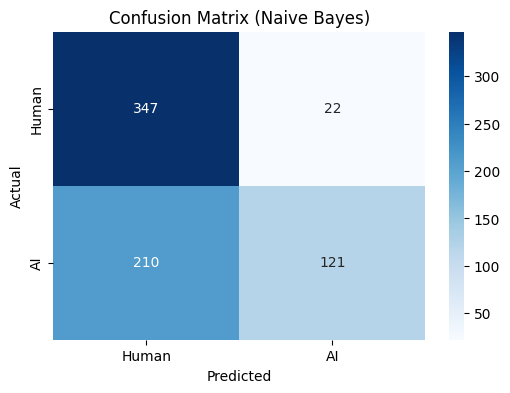

Evaluation of model Random Forest
ROC AUC Score: 0.9797
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       369
           1       0.95      0.91      0.93       331

    accuracy                           0.93       700
   macro avg       0.93      0.93      0.93       700
weighted avg       0.93      0.93      0.93       700



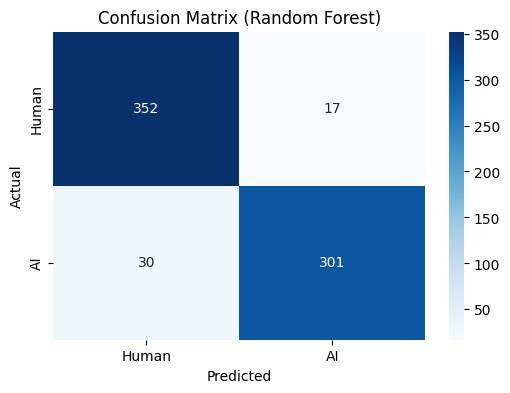

Evaluation of model GradientBoosting
ROC AUC Score: 0.9861
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       369
           1       0.94      0.94      0.94       331

    accuracy                           0.94       700
   macro avg       0.94      0.94      0.94       700
weighted avg       0.94      0.94      0.94       700



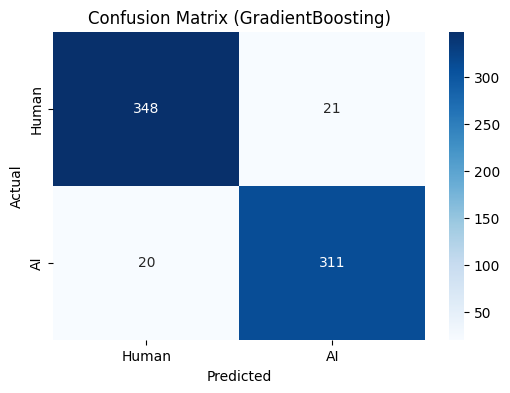

In [ ]:
for model_name, model in models.items():
    # Train model
    model.fit(X_train_vectors, y_train)

    # Predict on test data
    y_pred = model.predict(X_test_vectors)
    y_proba = model.predict_proba(X_test_vectors)[:, 1]

    print(f"Evaluation of model {model_name}")
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)



    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()


    # # Save the model
    # model_filename = f"{model_name}_model.joblib"  # Save each model with its name
    # joblib.dump(model, model_filename)

# Evaluation on Coling dataset


Evaluation of model XGBoost
ROC AUC Score: 0.6072
              precision    recall  f1-score   support

           0       0.46      0.42      0.44       273
           1       0.65      0.69      0.67       427

    accuracy                           0.58       700
   macro avg       0.56      0.55      0.55       700
weighted avg       0.58      0.58      0.58       700



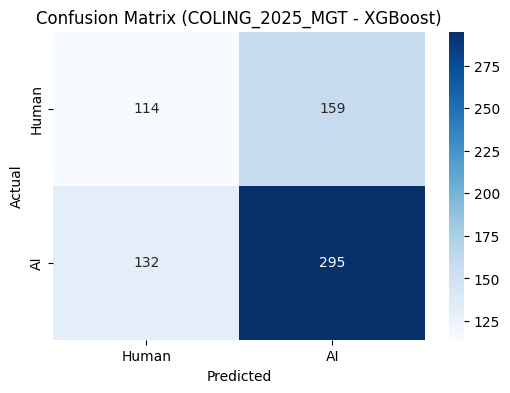

Evaluation of model SVM
ROC AUC Score: 0.6280
              precision    recall  f1-score   support

           0       0.47      0.53      0.50       273
           1       0.67      0.61      0.64       427

    accuracy                           0.58       700
   macro avg       0.57      0.57      0.57       700
weighted avg       0.59      0.58      0.58       700



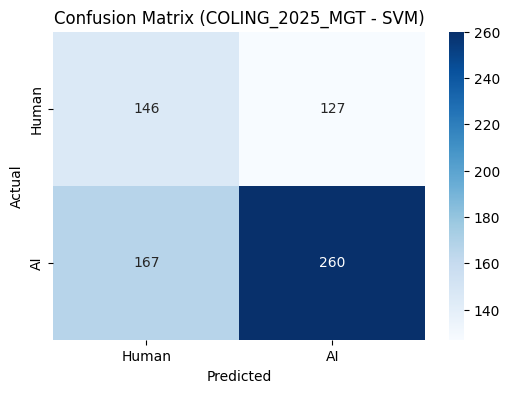

Evaluation of model Naive Bayes
ROC AUC Score: 0.5217
              precision    recall  f1-score   support

           0       0.40      0.86      0.55       273
           1       0.67      0.18      0.29       427

    accuracy                           0.45       700
   macro avg       0.54      0.52      0.42       700
weighted avg       0.57      0.45      0.39       700



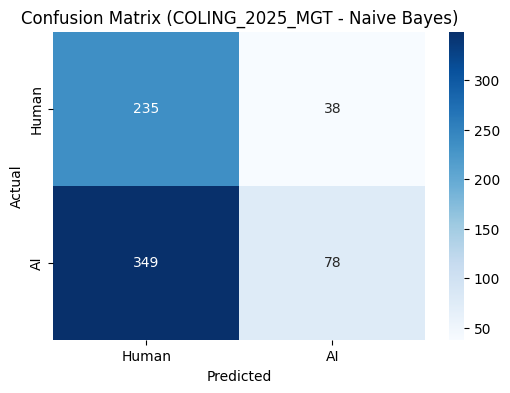

Evaluation of model Random Forest
ROC AUC Score: 0.5541
              precision    recall  f1-score   support

           0       0.45      0.42      0.44       273
           1       0.65      0.68      0.66       427

    accuracy                           0.58       700
   macro avg       0.55      0.55      0.55       700
weighted avg       0.57      0.58      0.57       700



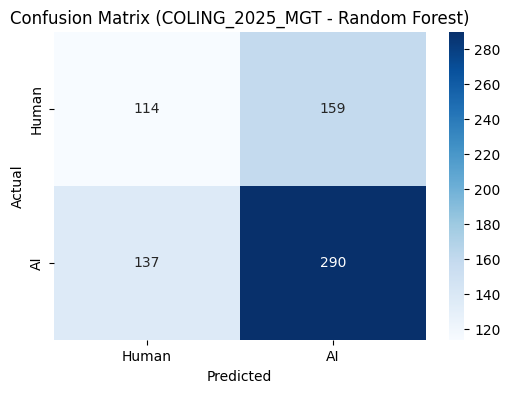

Evaluation of model GradientBoosting
ROC AUC Score: 0.5700
              precision    recall  f1-score   support

           0       0.45      0.37      0.41       273
           1       0.64      0.71      0.67       427

    accuracy                           0.58       700
   macro avg       0.54      0.54      0.54       700
weighted avg       0.56      0.58      0.57       700



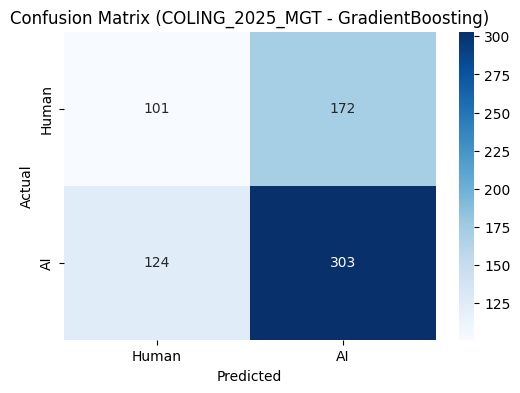

In [ ]:
for model_name, model in models.items():
    y_pred = model.predict(X_coling_vectors)
    y_proba = model.predict_proba(X_coling_vectors)[:, 1]

    print(f"Evaluation of model {model_name}")
    roc_auc = roc_auc_score(y_coling, y_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(classification_report(y_coling, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_coling, y_pred)



    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix (COLING_2025_MGT - {model_name})')
    plt.show()

Evaluation of model XGBoost
ROC AUC Score: 0.8407
              precision    recall  f1-score   support

           0       0.46      0.96      0.62       224
           1       0.96      0.46      0.63       476

    accuracy                           0.62       700
   macro avg       0.71      0.71      0.62       700
weighted avg       0.80      0.62      0.62       700



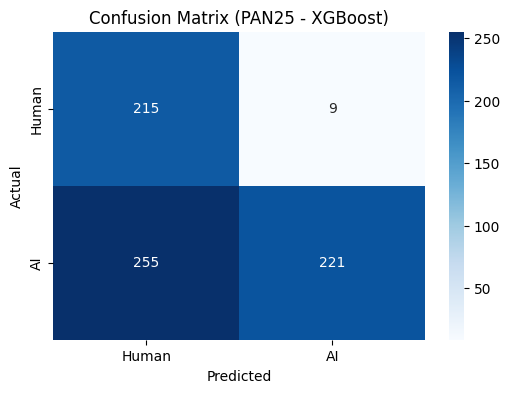

Evaluation of model SVM
ROC AUC Score: 0.8718
              precision    recall  f1-score   support

           0       0.44      0.96      0.61       224
           1       0.95      0.43      0.60       476

    accuracy                           0.60       700
   macro avg       0.70      0.70      0.60       700
weighted avg       0.79      0.60      0.60       700



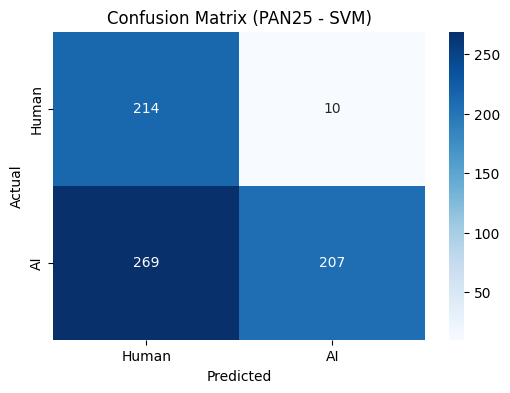

Evaluation of model Naive Bayes
ROC AUC Score: 0.5391
              precision    recall  f1-score   support

           0       0.34      0.97      0.50       224
           1       0.89      0.11      0.19       476

    accuracy                           0.38       700
   macro avg       0.62      0.54      0.35       700
weighted avg       0.72      0.38      0.29       700



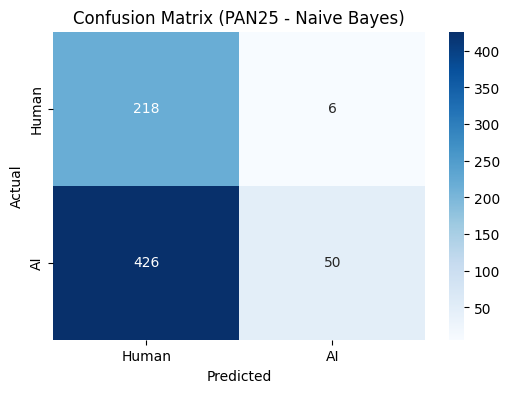

Evaluation of model Random Forest
ROC AUC Score: 0.8745
              precision    recall  f1-score   support

           0       0.46      0.95      0.62       224
           1       0.95      0.46      0.62       476

    accuracy                           0.62       700
   macro avg       0.70      0.71      0.62       700
weighted avg       0.79      0.62      0.62       700



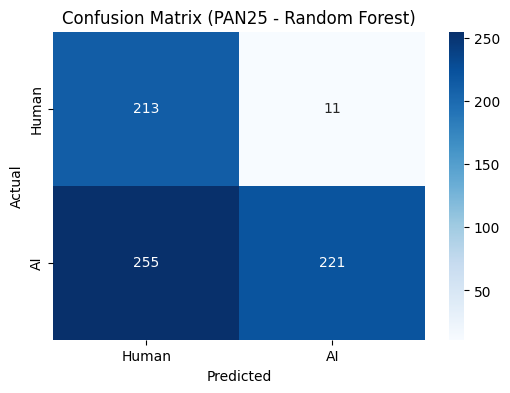

Evaluation of model GradientBoosting
ROC AUC Score: 0.8538
              precision    recall  f1-score   support

           0       0.51      0.92      0.66       224
           1       0.94      0.58      0.72       476

    accuracy                           0.69       700
   macro avg       0.73      0.75      0.69       700
weighted avg       0.80      0.69      0.70       700



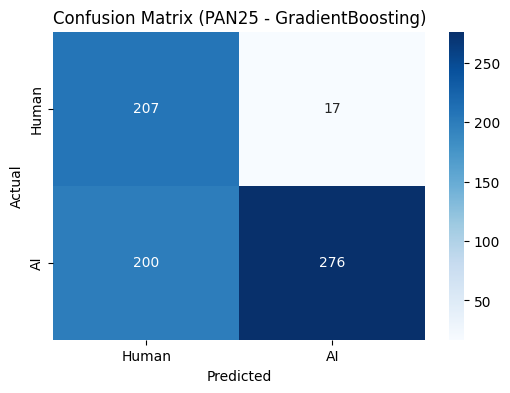

In [ ]:
for model_name, model in models.items():
    y_pred = model.predict(X_pan_vectors)
    y_proba = model.predict_proba(X_pan_vectors)[:, 1]

    print(f"Evaluation of model {model_name}")
    roc_auc = roc_auc_score(y_pan, y_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(classification_report(y_pan, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_pan, y_pred)



    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix (PAN25 - {model_name})')
    plt.show()